In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

In [2]:
df = pd.read_csv('challenge_dataset.txt', names=['X', 'Y'])

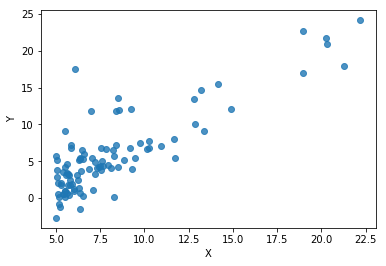

In [3]:
sns.regplot(x = 'X', y = 'Y', data = df, fit_reg = False)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = np.array(train_test_split(df['X'], df['Y'], test_size = 0.1))

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
print('Score:', reg.score(x_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1)))

Score: 0.797086646074


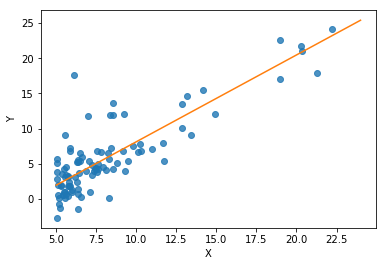

In [7]:
x_line = np.arange(5, 25).reshape(-1, 1)
sns.regplot(x = df['X'], y = df['Y'], data = df, fit_reg=False)
plt.plot(x_line,reg.predict(x_line))
plt.show()

In [8]:
co2_df = pd.read_csv('global_co2.csv')
temp_df = pd.read_csv('annual_temp.csv')
print(co2_df.head())
print(temp_df.head())

   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
    Source  Year    Mean
0     GCAG  2015  0.8990
1  GISTEMP  2015  0.8700
2     GCAG  2014  0.7402
3  GISTEMP  2014  0.7500
4     GCAG  2013  0.6687


In [9]:
co2_df = co2_df.iloc[:, :2]
co2_df = co2_df.loc[co2_df['Year'] >= 1960].loc[co2_df['Year'] <= 2010]
co2_df.columns = ['Year', 'CO2']
co2_df = co2_df.reset_index(drop = True)

temp_df = temp_df[temp_df.Source != 'GISTEMP']
temp_df.drop('Source', inplace = True, axis = 1)
temp_df = temp_df.reindex(index=temp_df.index[::-1])
temp_df = temp_df.loc[temp_df['Year'] >= 1960].loc[temp_df['Year'] <= 2010]
temp_df.columns = ['Year', 'Temperature']
temp_df = temp_df.reset_index(drop = True)

print(co2_df.head())
print(temp_df.head())

   Year   CO2
0  1960  2569
1  1961  2580
2  1962  2686
3  1963  2833
4  1964  2995
   Year  Temperature
0  1960       0.0252
1  1961       0.0818
2  1962       0.0924
3  1963       0.1100
4  1964      -0.1461


In [11]:
climate_change_df = pd.concat([co2_df, temp_df.Temperature], axis =1)
print(climate_change_df.head())

   Year   CO2  Temperature
0  1960  2569       0.0252
1  1961  2580       0.0818
2  1962  2686       0.0924
3  1963  2833       0.1100
4  1964  2995      -0.1461


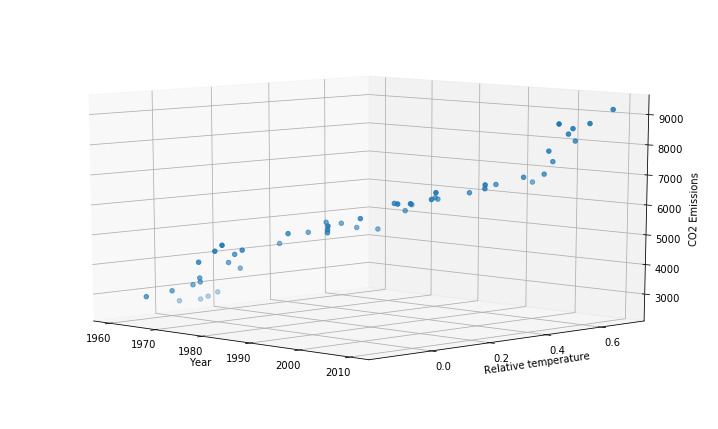

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs = climate_change_df['Year'], ys = climate_change_df['Temperature'], zs = climate_change_df['CO2'])
ax.set_ylabel('Relative temperature')
ax.set_xlabel('Year')
ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)

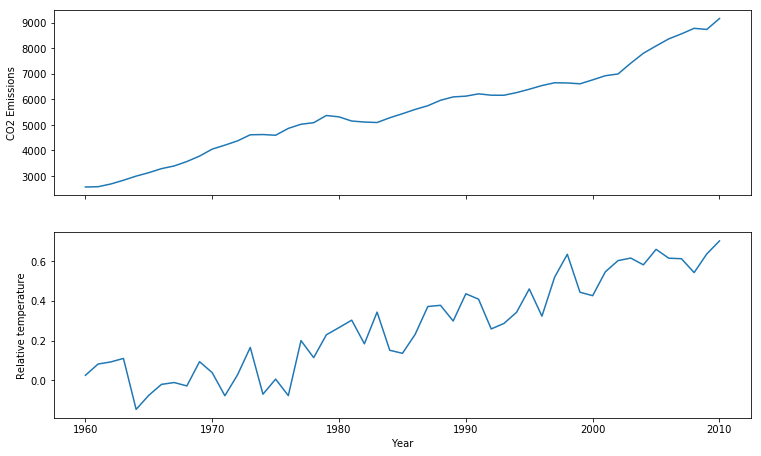

In [13]:
f, axarr = plt.subplots(2, sharex = True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].set_ylabel('Relative temperature')
axarr[1].set_xlabel('Year')

In [14]:
X = climate_change_df.as_matrix(['Year'])
Y = climate_change_df.as_matrix(['CO2', 'Temperature']).astype('float32')

xtrain, xtest, ytrain, ytest = np.asarray(train_test_split(X, Y, test_size = 0.1))

In [16]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print('Score:', reg.score(xtest.reshape(-1, 1), ytest))

Score: 0.955015809965


In [18]:
xline = np.arange(1960, 2011).reshape(-1, 1)
p = reg.predict(xline).T

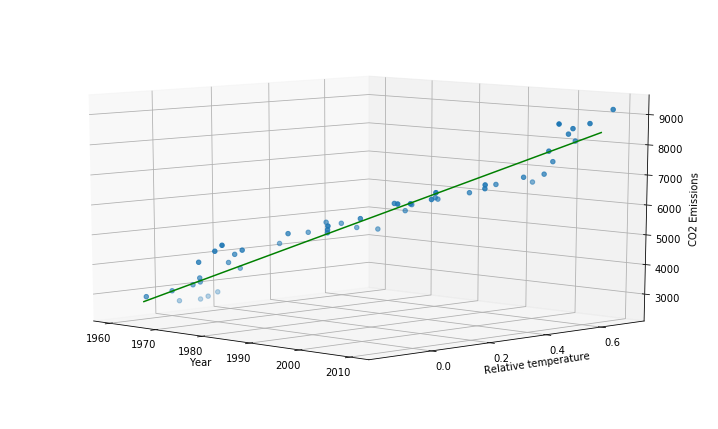

In [19]:
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection = '3d')
ax.scatter(xs = climate_change_df['Year'], ys = climate_change_df['Temperature'], zs = climate_change_df['CO2'])

ax.set_ylabel('Relative temperature')
ax.set_xlabel('Year')
ax.set_zlabel('CO2 Emissions')
ax.plot(xs = xline, ys = p[1], zs = p[0], color = 'green')
ax.view_init(10, -45)

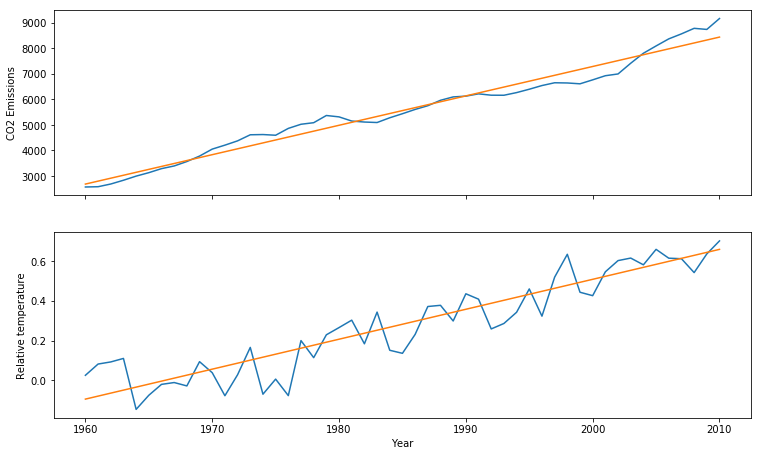

In [21]:
f, axarr = plt.subplots(2, sharex =True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].plot(xline, p[0])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].plot(xline, p[1])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')